### Gaussian Mixture Model  

Scenario:  
You’re analyzing customer shopping patterns and want to group customers into clusters while accounting for the uncertainty in their assignments.

In [24]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt

# Create Data
customers = pd.DataFrame({
    "Spending Score": [20, 21, 19, 80, 85, 82, 50, 49, 51, 55, 58],
    "Annual Income": [15, 16, 14, 85, 86, 84, 50, 51, 52, 54, 56]
})

customers.head(5)

,Spending Score,Annual Income
0,20,15
1,21,16
2,19,14
3,80,85
4,85,86


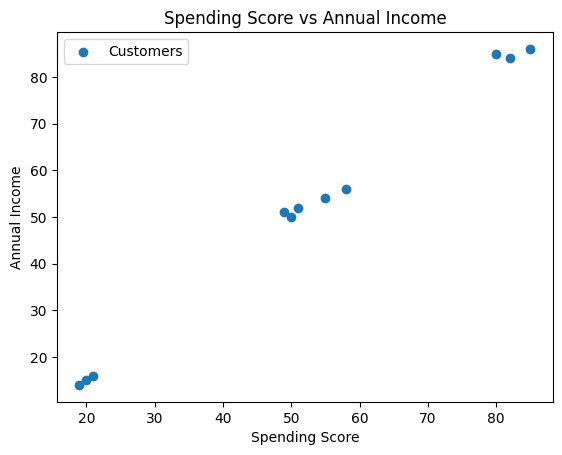

In [25]:
# Visualize Data
plt.scatter(customers['Spending Score'], customers['Annual Income'], label = 'Customers')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.title('Spending Score vs Annual Income')
plt.legend()
plt.show()

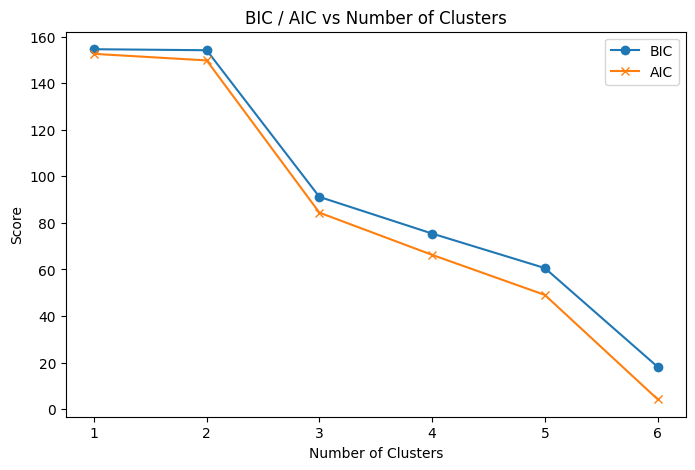

Look for the elbow


In [30]:
# Find the optimal number of clusters (BIC / AIC)
original_features = customers[["Spending Score", "Annual Income"]]

bic_scores = []
aic_scores = []
n_components_range = range(1, 7) # checking for 1 to 6 clusters

# Fit GMM for each number of clusters
for n in n_components_range:
    gmm = GaussianMixture(n_components = n, random_state = 42)
    gmm.fit(original_features)
    bic_scores.append(gmm.bic(original_features))
    aic_scores.append(gmm.aic(original_features))

# Plot the BIC and AIC
plt.figure(figsize = (8, 5))
plt.plot(n_components_range, bic_scores, label = 'BIC', marker = 'o')
plt.plot(n_components_range, aic_scores, label = 'AIC', marker = 'x')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('BIC / AIC vs Number of Clusters')
plt.legend()
plt.show()

print('Look for the elbow')

In [26]:
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components = 3, random_state = 42)
customers['Cluster'] = gmm.fit_predict(customers)
customers.head(5)

,Spending Score,Annual Income,Cluster
0,20,15,2
1,21,16,2
2,19,14,2
3,80,85,0
4,85,86,0


In [27]:
# Probabilies of cluster membership
# Extract original feature columns (without the added Cluster column)
original_features = customers[["Spending Score", "Annual Income"]]

# Probabilities of cluster membership
customers["Cluster Probability"] = gmm.predict_proba(original_features)[:, 0]
customers

,Spending Score,Annual Income,Cluster,Cluster Probability
0,20,15,2,0.000000e+00
1,21,16,2,0.000000e+00
2,19,14,2,0.000000e+00
3,80,85,0,1.000000e+00
4,85,86,0,1.000000e+00
5,82,84,0,1.000000e+00
6,50,50,1,0.000000e+00
7,49,51,1,0.000000e+00
8,51,52,1,0.000000e+00
9,55,54,1,0.000000e+00


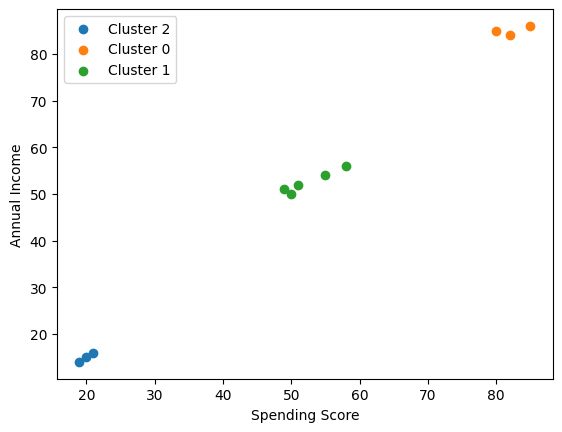

In [28]:
# Visualize Clusters
for cluster in customers['Cluster'].unique():
    cluster_data = customers[customers['Cluster'] == cluster]
    plt.scatter(cluster_data['Spending Score'], cluster_data['Annual Income'], label = f'Cluster {cluster}')

plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

### Metrics

In [31]:
# Cluster Probability Mean
probabilities = gmm.predict_proba(original_features)
average_probs = probabilities.max(axis = 1).mean()
print(f'Average Cluster Assignment Probability: {average_probs}')

Average Cluster Assignment Probability: 0.9999999999999974


In [32]:
# Silhouette Score
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(original_features, customers['Cluster'])
print(f'Silhouette Score: {silhouette}')

Silhouette Score: 0.9077827771736741


In [33]:
# Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score
calinski = calinski_harabasz_score(original_features, customers['Cluster'])
print(f'Calinski-Harabasz Index: {calinski}')

Calinski-Harabasz Index: 533.0635017741342
